In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("C:/Users/Nantha/Documents/Glassdoor-Job-Salary-Prediction/Glassdoor_Salary_Cleaned.csv")

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Min Salary,Max Salary,Avg Salary,Job State,Same State,Age,R,Python,AWS,Excel
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,96,101,98.5,MA,0,24,0,1,0,0
1,Data Scientist,96-101,Overview\r\n\r\n\r\nData Scientist\r\n\r\nLoca...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,96,101,98.5,MA,1,39,0,1,1,1
2,Data Scientist,96-101,Search by Keyword\r\nMore Options\r\n\r\nSearc...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981,Company - Public,...,96,101,98.5,MA,1,39,0,1,1,1
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,Company - Private,...,96,101,98.5,MA,1,46,0,1,0,1
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010,Company - Private,...,96,101,98.5,MA,1,10,0,1,0,1


In [6]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [20]:
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)

In [21]:
df['Job Simplified'].value_counts()

data scientist    1000
Name: Job Simplified, dtype: int64

In [22]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [23]:
df['Seniority'].value_counts()

na        691
senior    300
junior      9
Name: Seniority, dtype: int64

In [24]:
df['Job State'].value_counts()

 CA    400
 NY    266
 MA    200
 WA    100
 NJ     30
 CT      4
Name: Job State, dtype: int64

In [25]:
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))

In [26]:
df['Desc Length']

0       5126
1       9845
2      10692
3       2187
4       3736
       ...  
995     4305
996     2684
997     3550
998     1077
999     3406
Name: Desc Length, Length: 1000, dtype: int64

## Competitor Count

In [27]:
df['No of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [28]:
df['No of Competitors']

0      0
1      0
2      2
3      3
4      0
      ..
995    3
996    0
997    2
998    0
999    0
Name: No of Competitors, Length: 1000, dtype: int64

In [33]:
df.describe()

,Rating,Founded,Min Salary,Max Salary,Avg Salary,Same State,Age,R,Python,AWS,Excel,Desc Length,No of Competitors
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000
mean,3.291800,1553.282000,108.900000,152.340000,130.620000,0.379000,29.966000,0.001000,0.79200,0.224000,0.379000,3346.141000,0.9340
std,1.667775,817.329655,32.903079,46.839495,38.630272,0.485381,45.282197,0.031623,0.40608,0.417131,0.485381,1622.923202,1.3362
min,-1.000000,-1.000000,50.000000,99.000000,75.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,110.000000,0.0000
25%,3.300000,1853.000000,89.000000,128.000000,106.000000,0.000000,4.000000,0.000000,1.00000,0.000000,0.000000,2222.000000,0.0000
50%,3.800000,1994.000000,101.000000,143.000000,125.000000,0.000000,14.000000,0.000000,1.00000,0.000000,0.000000,3321.500000,0.0000
75%,4.200000,2008.000000,125.000000,156.000000,140.500000,1.000000,31.000000,0.000000,1.00000,0.000000,1.000000,4266.000000,3.0000
max,5.000000,2019.000000,212.000000,332.000000,272.000000,1.000000,330.000000,1.000000,1.00000,1.000000,1.000000,15121.000000,4.0000


In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length', 'No of Competitors'],
      dtype='object')

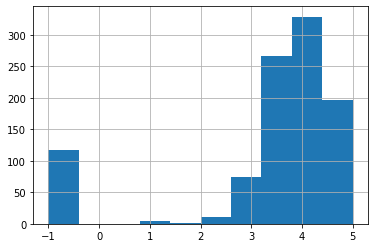

In [36]:
df['Rating'].hist()
plt.show()

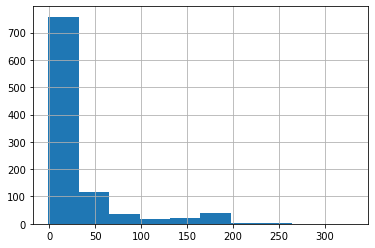

In [40]:
df['Age'].hist()
plt.show()

We must have to normalize age

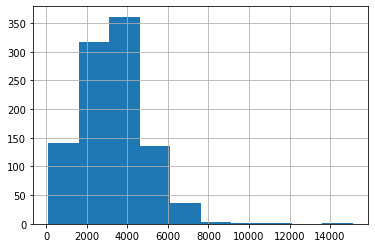

In [39]:
df['Desc Length'].hist()
plt.show()

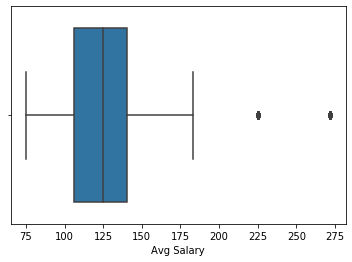

In [41]:
sns.boxplot(df['Avg Salary'])

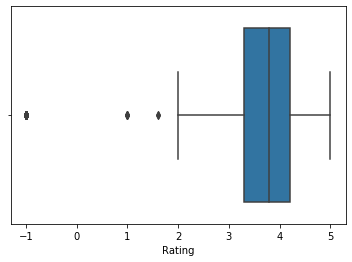

In [42]:
sns.boxplot(df['Rating'])

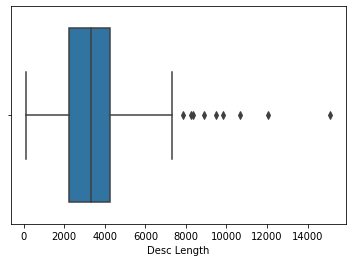

In [43]:
sns.boxplot(df['Desc Length'])

In [45]:
df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr()

,Age,Avg Salary,Desc Length,Rating
Age,1.000000,-0.096338,0.220696,0.180716
Avg Salary,-0.096338,1.000000,-0.057283,0.012045
Desc Length,0.220696,-0.057283,1.000000,0.147379
Rating,0.180716,0.012045,0.147379,1.000000


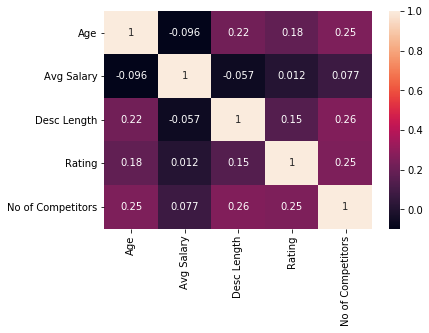

In [49]:
sns.heatmap(df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr(),annot=True)
plt.show()

In [51]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership','Industry', 'Sector', 'Revenue','Company Name', 'Job State', 'Same State','R', 'Python', 'AWS', 'Excel','Job Simplified', 'Seniority']]

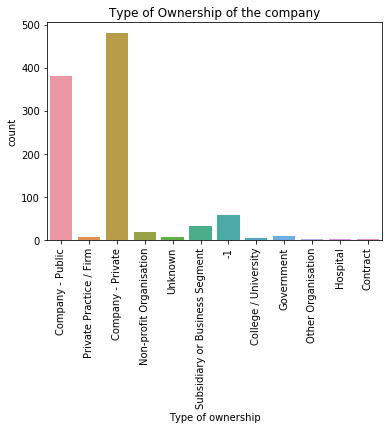

In [55]:
sns.countplot(df['Type of ownership'])
plt.title("Type of Ownership of the company")
plt.xticks(rotation=90)
plt.show()

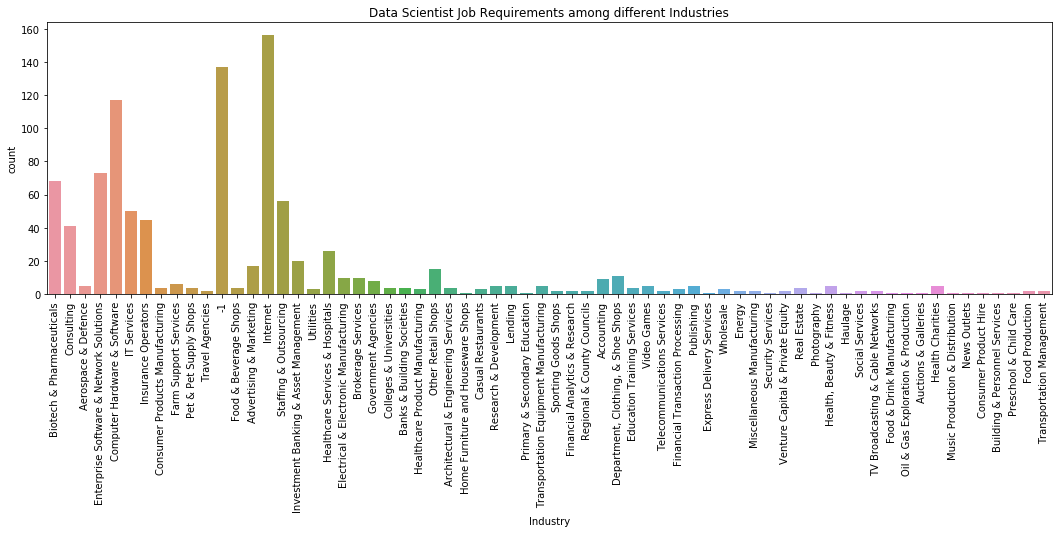

In [59]:
plt.figure(figsize=(18,5))
sns.countplot(df['Industry'])
plt.title("Data Scientist Job Requirements among different Industries")
plt.xticks(rotation=90)
plt.show()

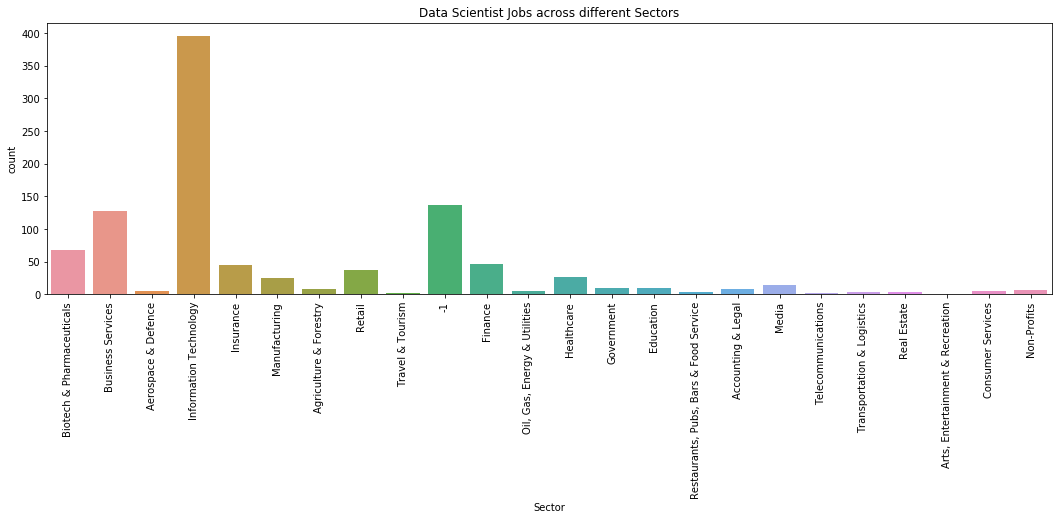

In [64]:
plt.figure(figsize=(18,5))
sns.countplot(df['Sector'])
plt.title("Data Scientist Jobs across different Sectors")
plt.xticks(rotation=90)
plt.show()

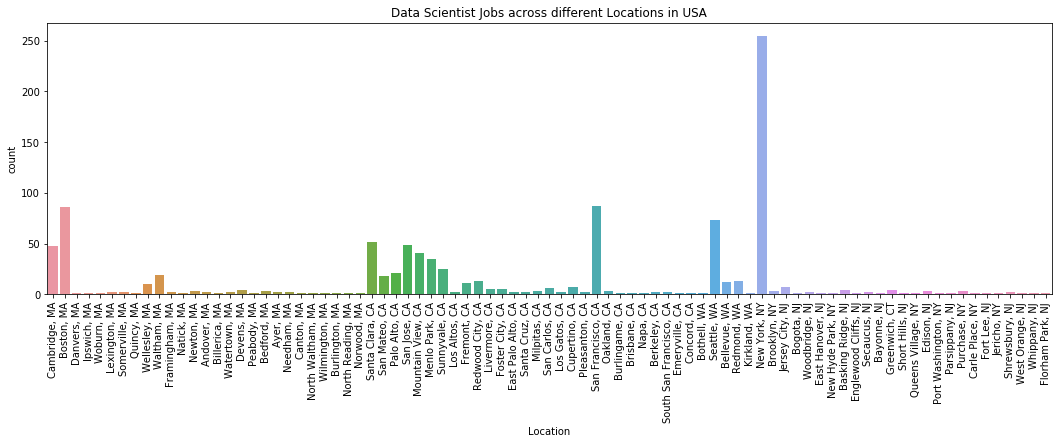

In [67]:
plt.figure(figsize=(18,5))
sns.countplot(df['Location'])
plt.title("Data Scientist Jobs across different Locations in USA")
plt.xticks(rotation=90)
plt.show()

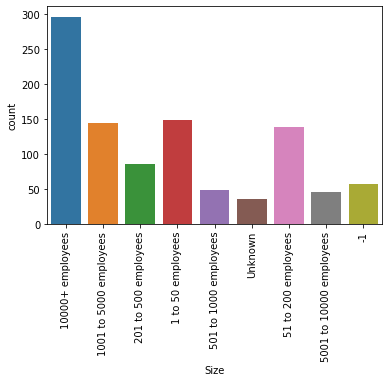

In [71]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Size'])
plt.xticks(rotation=90)
plt.show()

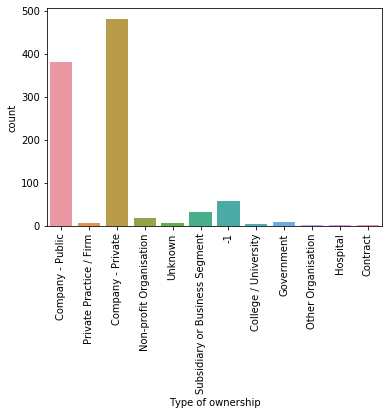

In [73]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Type of ownership'])
plt.xticks(rotation=90)
plt.show()

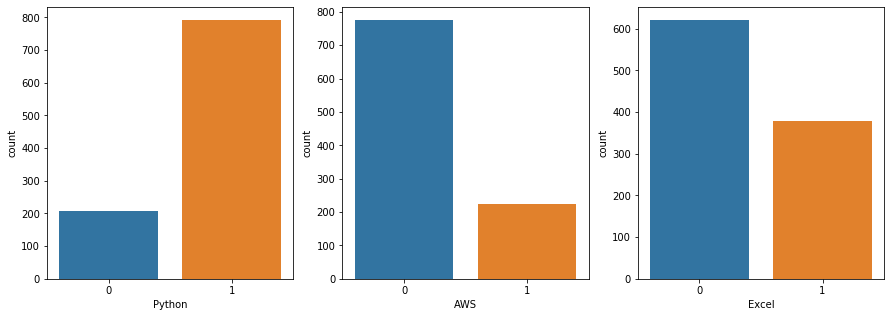

In [95]:

fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['Python'],ax=axes[0])
sns.countplot(df['AWS'],ax=axes[1])
sns.countplot(df['Excel'],ax=axes[2])
# plt.title("Top Skills required for Data Scientist Roles")
plt.show()

In [98]:
df['Seniority'].value_counts()

na        691
senior    300
junior      9
Name: Seniority, dtype: int64

In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length', 'No of Competitors'],
      dtype='object')

In [99]:
pd.pivot_table(df,index=['Seniority'],values=['Avg Salary'])

,Avg Salary
Seniority,
junior,122.555556
na,131.211288
senior,129.500000


In [103]:
pd.pivot_table(df,index=['Job State'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Job State,
CA,150.675000
WA,134.000000
NJ,118.383333
NY,118.005639
MA,107.975000
CT,103.500000


We can see that California makes the most Avg Salary

In [110]:
pd.pivot_table(df,index=['Sector'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Sector,
Telecommunications,186.250000
Accounting & Legal,147.222222
Education,145.700000
Information Technology,140.672980
Aerospace & Defence,140.300000
Non-Profits,134.000000
Government,133.500000
Real Estate,129.125000
Manufacturing,128.060000


Its interesting to see that Telecommunications gives the most avg salary

In [112]:
pd.pivot_table(df,index=['Python'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Python,
1,131.895202
0,125.764423


In [113]:
pd.pivot_table(df,index=['Excel'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Excel,
1,131.488127
0,130.090177


In [114]:
pd.pivot_table(df,index=['AWS'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
AWS,
0,131.986469
1,125.886161


In [115]:
pd.pivot_table(df,index=['Revenue'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Revenue,
₹5 to ₹10 billion (INR),141.388889
₹500 million to ₹1 billion (INR),138.894737
₹500+ billion (INR),137.137681
-1,136.578947
₹10 to ₹50 million (INR),133.757576
₹100 to ₹500 million (INR),130.595238
₹1 to ₹5 billion (INR),129.331250
Unknown / Non-Applicable,128.191520
₹100 to ₹500 billion (INR),121.258621


In [117]:
pd.pivot_table(df,index=['Rating'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Rating,
2.4,165.875000
4.7,153.960000
4.2,147.840000
4.1,145.184211
4.4,140.844262
4.3,138.957447
1.6,133.750000
-1.0,132.500000
2.7,132.071429


In [118]:
pd.pivot_table(df,index=['Type of ownership'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Type of ownership,
Other Organisation,147.500000
-1,136.578947
Company - Public,136.328084
Government,133.944444
Contract,133.000000
Hospital,133.000000
Unknown,127.857143
Company - Private,126.475052
Subsidiary or Business Segment,125.234375


In [108]:
pd.options.display.max_rows

In [107]:
pd.set_option('display.max_rows',None)

In [123]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [120]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

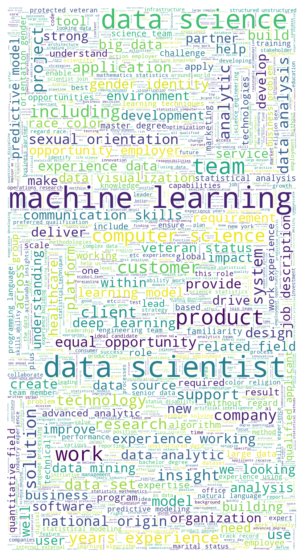

In [124]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()